<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/PROJETO_CLUSTERS_CELTIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://s.yimg.com/ny/api/res/1.2/XZJQXxW713uWZANrYyl_Yw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTEyMDA7aD04MDA-/https://media.zenfs.com/en/celtics_wire_usa_today_sports_articles_699/d5d704b4bd389d813ac9db1628e4e7d1" width="90%"></p>
O Boston Celtics vive uma grande fase, estando na final da NBA e tendo como grande estrela Jayson Tatum, um ala fenomenal. Porém, a equipe precisa começar a se programar para a próxima temporada. Pensando nisso, vou utilizar as estatísticas dos jogadores desta temporada da NBA para dar sugestões de contratações para a próxima temporada, visando os pontos fracos do time. Irei utilizar a biblioteca PyCaret para o modelo de cluster, poupando assim o trabalho de pré-processamento dos dados.

In [ ]:
!pip install pycaret[full]

In [5]:
import pycaret
import pandas as pd


In [6]:
df = pd.read_csv('/content/database_csv.csv') #Dataset baixado do Kaggle, contendo as estatisticas da temporada 23-24

In [7]:
df.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Nikola Jokić,DEN,LAL,W,36.27,12,22,0.545,3,5,...,10,13,11,1,1,2,2,29,29.3,2023-10-24
1,Devin Booker,PHO,GSW,W,36.97,13,21,0.619,3,8,...,5,6,8,1,0,6,4,32,23.7,2023-10-24
2,LeBron James,LAL,DEN,L,29.00,10,16,0.625,1,4,...,7,8,5,1,0,0,1,21,20.3,2023-10-24
3,Aaron Gordon,DEN,LAL,W,34.98,7,11,0.636,1,2,...,5,7,5,2,1,0,0,15,19.2,2023-10-24
4,Jamal Murray,DEN,LAL,W,34.25,8,13,0.615,3,5,...,2,2,6,0,1,1,3,21,18.4,2023-10-24


In [21]:
df.info()
#Como podem ver, 28189 jogadores entraram em campo esta temporada

<class 'pandas.core.frame.DataFrame'>
Index: 27196 entries, 0 to 28187
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  27196 non-null  object 
 1   Tm      27196 non-null  object 
 2   Opp     27196 non-null  object 
 3   Res     27196 non-null  object 
 4   MP      27196 non-null  float64
 5   FG      27196 non-null  int64  
 6   FGA     27196 non-null  int64  
 7   FG%     27196 non-null  float64
 8   3P      27196 non-null  int64  
 9   3PA     27196 non-null  int64  
 10  3P%     27196 non-null  float64
 11  FT      27196 non-null  int64  
 12  FTA     27196 non-null  int64  
 13  FT%     27196 non-null  float64
 14  ORB     27196 non-null  int64  
 15  DRB     27196 non-null  int64  
 16  TRB     27196 non-null  int64  
 17  AST     27196 non-null  int64  
 18  STL     27196 non-null  int64  
 19  BLK     27196 non-null  int64  
 20  TOV     27196 non-null  int64  
 21  PF      27196 non-null  int64  
 22  PTS

In [9]:
df.describe()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000,28189.000000
mean,22.551016,3.919579,8.278513,0.433676,1.190429,3.265706,0.263282,1.581894,2.017773,0.412022,0.983008,3.075881,4.058888,2.473021,0.691688,0.478165,1.197382,1.750506,10.611515,8.680840
std,11.279222,3.361749,6.230980,0.258466,1.489543,3.051773,0.292551,2.303866,2.760496,0.435849,1.359300,2.732678,3.483211,2.659211,0.934332,0.853415,1.373539,1.455970,9.026715,7.991523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.200000
25%,14.130000,1.000000,3.000000,0.286000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.300000
50%,23.570000,3.000000,7.000000,0.455000,1.000000,3.000000,0.200000,1.000000,1.000000,0.250000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,9.000000,7.200000
75%,31.830000,6.000000,12.000000,0.583000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,1.000000,4.000000,6.000000,4.000000,1.000000,1.000000,2.000000,3.000000,16.000000,13.400000
max,53.950000,25.000000,47.000000,1.000000,12.000000,23.000000,1.000000,24.000000,32.000000,1.000000,15.000000,20.000000,31.000000,23.000000,7.000000,10.000000,11.000000,6.000000,73.000000,64.000000


Retirando jogadores do dataset que ja jogam no Celtics:

In [10]:
df = df[df['Tm'] != 'BOS']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27196 entries, 0 to 28187
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  27196 non-null  object 
 1   Tm      27196 non-null  object 
 2   Opp     27196 non-null  object 
 3   Res     27196 non-null  object 
 4   MP      27196 non-null  float64
 5   FG      27196 non-null  int64  
 6   FGA     27196 non-null  int64  
 7   FG%     27196 non-null  float64
 8   3P      27196 non-null  int64  
 9   3PA     27196 non-null  int64  
 10  3P%     27196 non-null  float64
 11  FT      27196 non-null  int64  
 12  FTA     27196 non-null  int64  
 13  FT%     27196 non-null  float64
 14  ORB     27196 non-null  int64  
 15  DRB     27196 non-null  int64  
 16  TRB     27196 non-null  int64  
 17  AST     27196 non-null  int64  
 18  STL     27196 non-null  int64  
 19  BLK     27196 non-null  int64  
 20  TOV     27196 non-null  int64  
 21  PF      27196 non-null  int64  
 22  PTS

O time precisa de defensores para a próxima temporada. A grande estrela do time, Tatum, está confirmada para 2025, então o time precisa se reforçar. O único ponto fraco do time finalista da NBA 2024 é o grande número de rebotes oferecidos, segundo a imprensa americana.

Vamos agora para o nosso modelo de Cluster

In [11]:
from pycaret.clustering import *
setup = setup(df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(27196, 25)"
2,Transformed data shape,"(27196, 836)"
3,Numeric features,20
4,Categorical features,5
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [12]:
models() #Lista de modelos disponiveis na biblioteca Pycaret, iremos utilizar o K-means

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [13]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2863,23187.9312,1.1765,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

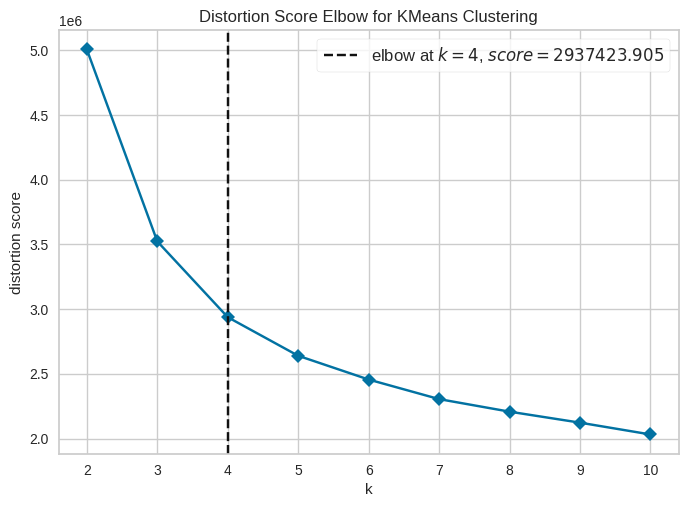

In [15]:
plot_model(kmeans, plot = 'elbow') #O numero de clusters foi setado em 4 pelo elbow method

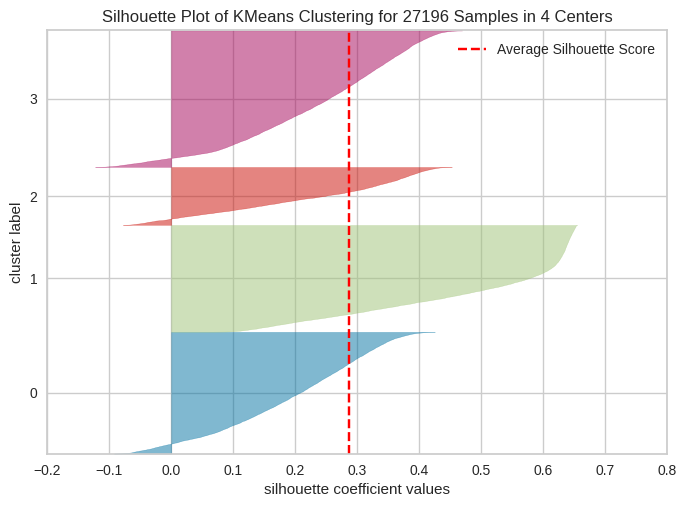

In [16]:
plot_model(kmeans, plot ='silhouette' )

In [14]:
plot_model(kmeans, plot = 'cluster')

Olhando para o gráfico, irei escolher 3 jogadores baseados no PCA (Análise de Componentes Principais).Jogadores com PCA alto se destacam dos demais por terem estatísticas diferentes do resto do grupo.

Tyrese Haliburton
<p align="center"><img src="https://www.si.com/.image/c_fit%2Ch_800%2Cw_1200/MjA0MDA0Mzg4NjgxODE5NzA4/tyresehaliburton.jpg" width="80%"></p>

Pertence ao Indiana Pacers e se destacou em nosso modelo, tendo o maior PCA2. Ele é um armador forte e pode ajudar na defesa do time.Teve um rating de defesa de 118.7, considerado alto.

Derrick Jones
<p align="center"><img src="https://cdn.vox-cdn.com/thumbor/StnYDFeQpDU_bT1wM9N6bB8iuk4=/0x0:5013x7520/1200x800/filters:focal(2829x1759:3631x2561)/cdn.vox-cdn.com/uploads/chorus_image/image/72855488/1775234963.0.jpg" width="100%"></p>
Com um defensive rating de 116.3, Derrick Jones também se destacou em nosso modelo. Ele possui características bastante defensivas, mas também tem velocidade para o ataque. Atualmente joga pelo Mavericks e vem fazendo uma boa temporada.

Nicolas Batum
<p align="center"><img src="https://cdn.vox-cdn.com/thumbor/vRulnMGKr4sGlUsPOtxYcc02oJc=/0x0:5039x3359/1200x800/filters:focal(2239x406:3045x1212)/cdn.vox-cdn.com/uploads/chorus_image/image/72988333/1846349657.0.jpg" width="80%"></p>
Por fim, o veterano Nicolas Batum, de 35 anos, também se destacou em nosso modelo. Com um rating defensivo de 115, o jogador ainda vem jogando em alto nível, principalmente defensivamente, sendo uma boa opção para um contrato mais curto. Atualmente, ele está no Philadelphia 76ers.